In [ ]:
import tensorflow as tf
print(tf.__version__)
!pip list | grep waymo
!pip list | grep torch

2.4.1
torch                         1.8.1+cu101   
torchsummary                  1.5.1         
torchtext                     0.9.1         
torchvision                   0.9.1+cu101   


In [ ]:
!pip3 install waymo-open-dataset-tf-2-1-0==1.2.0

     |████████████████████████████████| 2.8MB 7.6MB/s 
     |████████████████████████████████| 421.8MB 37kB/s 
     |████████████████████████████████| 3.9MB 104kB/s 
     |████████████████████████████████| 51kB 6.4MB/s 
     |████████████████████████████████| 450kB 46.8MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp37-none-any.whl size=7540 sha256=8b5bbfd2a49790e8d6651e491cb9ba90e23077539ad974772e1e8ba203390317
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow 2.4.1 has requirement gast==0.3.3, but you'll have gast 0.2.2 which is incompatible.
ERROR: tensorflow 2.4.1 has requirement tensorboard~=2.4, but you'll have tensorboard 2.1.1 which is incompatible.
ERROR: tensorflow 2.4.1 has requirement tensorflow-estimator<2.5.0,>=2.4.0, but you'll have tensorflow-estimator 2.1.0 which is incompatible.
ERROR: tensorflow-probability 0.12.1 has requirement gast>=0.3.2, but you'll have gast 

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [31]:
from google.colab import auth
auth.authenticate_user() 

In [ ]:
!gsutil ls

In [32]:
!gsutil -m cp -r "gs://waymo_open_dataset_v_1_2_0/training/training_0004.tar" "/content/drive/MyDrive/CMPE249Project_Data/waymo_dataset/training/"

Copying gs://waymo_open_dataset_v_1_2_0/training/training_0004.tar...
- [1/1 files][ 22.5 GiB/ 22.5 GiB] 100% Done  42.7 MiB/s ETA 00:00:00           
Operation completed over 1 objects/22.5 GiB.                                     


In [ ]:
!gsutil -m cp -r "gs://waymo_open_dataset_v_1_2_0/training/training_0005.tar" "/content/drive/MyDrive/CMPE249Project_Data/waymo_dataset/training/"

In [ ]:
import os
import tensorflow.compat.v1 as tf
import math
import numpy as np
import itertools

tf.enable_eager_execution()

from waymo_open_dataset.utils import range_image_utils
from waymo_open_dataset.utils import transform_utils
from waymo_open_dataset.utils import  frame_utils
from waymo_open_dataset import dataset_pb2 as open_dataset

In [ ]:
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

def myshow_camera_image(camera_image, camera_labels, layout, cmap=None):
    """Show a camera image and the given camera labels."""

    ax = plt.subplot(*layout)

    # Draw the camera labels.
    #for camera_labels in frame.camera_labels:
        #print(camera_labels)
        # Ignore camera labels that do not correspond to this camera.
#     if camera_labels.name != camera_image.name:
#         continue

    # Iterate over the individual labels.
    for label in camera_labels.labels:
        #print(label)
        # Draw the object bounding box.
        ax.add_patch(patches.Rectangle(
            xy=(label.box.center_x - 0.5 * label.box.length,
                label.box.center_y - 0.5 * label.box.width),
            width=label.box.length,
            height=label.box.width,
            linewidth=1,
            edgecolor='red',
            facecolor='none'))

    # Show the camera image.
    plt.imshow(tf.image.decode_jpeg(camera_image.image), cmap=cmap)
    plt.title(open_dataset.CameraName.Name.Name(camera_image.name))
    plt.grid(False)
    plt.axis('off')

In [ ]:
#from engine import train_one_epoch, evaluate
import torch
import torch.utils.data as data
import torch
print(torch.cuda.is_available())
print(torch.cuda.device_count())
print(torch.cuda.get_device_name(0))
device = torch.device("cuda")

True
1
Tesla P100-PCIE-16GB


In [ ]:
!ls /content/drive/MyDrive/Colab\ Notebooks

 CMPE249.ipynb
'Copy of WaymoKitti3DVisualizev2.ipynb'
 Copy_of_Waymo_Open_Dataset_Tutorial.ipynb
'Copy of WaymoTrain.ipynb'
 engine.py
 transforms.py
 Untitled
 Untitled0.ipynb
 Untitled1.ipynb
 Untitled2.ipynb
 Untitled3.ipynb
 utils.py
 vehicle_classification.ipynb
 vehicle_classification_TPU_final.ipynb


In [ ]:
cd /content/drive/MyDrive/Colab\ Notebooks

/content/drive/MyDrive/Colab Notebooks


In [ ]:
!pwd

/content/drive/My Drive/Colab Notebooks


In [ ]:
import transforms as T
#from torchvision import transforms

def get_transform(train):
    transforms = []
    transforms.append(T.ToTensor())
    if train:
        transforms.append(T.RandomHorizontalFlip(0.5))
    return T.Compose(transforms)

In [ ]:
!ls /content/drive/MyDrive/CMPE249Project_Data/waymo_dataset/training/training_0005

In [46]:
!tar -xvf /content/drive/MyDrive/CMPE249Project_Data/waymo_dataset/training/training_0004.tar -C /content/drive/MyDrive/CMPE249Project_Data/waymo_dataset/training/training_0004/

segment-12179768245749640056_5561_070_5581_070_with_camera_labels.tfrecord
segment-12200383401366682847_2552_140_2572_140_with_camera_labels.tfrecord
segment-12208410199966712301_4480_000_4500_000_with_camera_labels.tfrecord
segment-12212767626682531382_2100_150_2120_150_with_camera_labels.tfrecord
segment-12251442326766052580_1840_000_1860_000_with_camera_labels.tfrecord
segment-12257951615341726923_2196_690_2216_690_with_camera_labels.tfrecord
segment-12273083120751993429_7285_000_7305_000_with_camera_labels.tfrecord
segment-12281202743097872109_3387_370_3407_370_with_camera_labels.tfrecord
segment-12303641360375776820_4378_000_4398_000_with_camera_labels.tfrecord
segment-12304907743194762419_1522_000_1542_000_with_camera_labels.tfrecord
segment-1231623110026745648_480_000_500_000_with_camera_labels.tfrecord
segment-12321865437129862911_3480_000_3500_000_with_camera_labels.tfrecord
segment-12337317986514501583_5346_260_5366_260_with_camera_labels.tfrecord
segment-12339284075576056695

In [ ]:
!tar -xvf /content/drive/MyDrive/CMPE249Project_Data/waymo_dataset/training/training_0005.tar -C /content/drive/MyDrive/CMPE249Project_Data/waymo_dataset/training/

In [49]:
from PIL import Image
from glob import glob
def loadWaymoFrames(PATH):
    train_folders = ["training_0005"]#,"training_0004","training_0003","training_0002","training_0001","training_0007"]#["training_0001"]# ["training_0000", "training_0001"]
    #["training_0015","training_0004"]
    data_files = [path for x in train_folders for path in glob(os.path.join(PATH, x, "*.tfrecord"))]
    print(data_files)#all TFRecord file list
    print(len(data_files))
    dataset = [tf.data.TFRecordDataset(FILENAME, compression_type='') for FILENAME in data_files]#create a list of dataset for each TFRecord file
    frames = [] #store all frames = total number of TFrecord files * 40 frame(each TFrecord)
    for i, data_file in enumerate(dataset):
        print("Datafile: ",i)#Each TFrecord file
        for idx, data in enumerate(data_file): #Create frame based on Waymo API, 199 frames per TFrecord (20s, 10Hz)
            if idx % 5 != 0: #Downsample every 5 images, reduce to 2Hz, total around 40 frames
                continue
            frame = open_dataset.Frame()
            frame.ParseFromString(bytearray(data.numpy()))
            frames.append(frame)
    return frames

In [54]:
waymoallframes=loadWaymoFrames('/content/drive/MyDrive/CMPE249Project_Data/waymo_dataset/training/')

['/content/drive/MyDrive/CMPE249Project_Data/waymo_dataset/training/training_0005/segment-12848519977617081063_2488_000_2508_000_with_camera_labels.tfrecord', '/content/drive/MyDrive/CMPE249Project_Data/waymo_dataset/training/training_0005/segment-12856053589272984699_1020_000_1040_000_with_camera_labels.tfrecord', '/content/drive/MyDrive/CMPE249Project_Data/waymo_dataset/training/training_0005/segment-12858738411692807959_2865_000_2885_000_with_camera_labels.tfrecord', '/content/drive/MyDrive/CMPE249Project_Data/waymo_dataset/training/training_0005/segment-12879640240483815315_5852_605_5872_605_with_camera_labels.tfrecord', '/content/drive/MyDrive/CMPE249Project_Data/waymo_dataset/training/training_0005/segment-12894036666871194216_787_000_807_000_with_camera_labels.tfrecord', '/content/drive/MyDrive/CMPE249Project_Data/waymo_dataset/training/training_0005/segment-12896629105712361308_4520_000_4540_000_with_camera_labels.tfrecord', '/content/drive/MyDrive/CMPE249Project_Data/waymo_dat

In [55]:
from PIL import Image
from glob import glob

class myNewWaymoDataset(data.Dataset): #Inheritance of data.Dataset, torch.utils.data
    def __init__(self, root, waymoframes, transforms=None):
        self.label_map = {0:0, 1: 1, 2:2, 4:3} #4 object types (remove sign)
        self.root = root
        self.transforms = transforms
        self.frames = waymoframes
        del_indexes = []
        #filter out frames with small or no annotations
        for i, frame in enumerate(self.frames): #Total number of TFrecord files * (Each TFrecord file, 40 frames)
            #print("lkk frame num: ",i)
            target = {}
            target_bbox = []
            target_labels = []
            target_areas = []
        
            for camera_labels in frame.camera_labels: #5 cameras
                #print(open_dataset.CameraName.Name.Name(camera_labels.name))
                if camera_labels.name != 1: #Only use front camera
                    continue
                    
                for label in camera_labels.labels:                    
                    xmin= label.box.center_x - 0.5 * label.box.length
                    ymin = label.box.center_y - 0.5 * label.box.width
                    xmax = xmin + label.box.length
                    ymax = ymin + label.box.width
                    area = label.box.length * label.box.width
                    if xmin<=xmax and ymin<=ymax and xmin>=0 and ymin>=0:# and xmax<=1920 and ymax<=1280:# and area>2000:
                        target_bbox.append([xmin, ymin, xmax, ymax])
                        target_labels.append(self.label_map[label.type])
                        target_areas.append(area)
                        if (label.type==3):#traffic sign
                            print("label.type==3")
                        if (label.type==0):#unknow
                            print("label.type==1")
                    else:
                        print("drop frame: ", i)
#                         print([label.box.center_x, label.box.center_y])
#                         print([label.box.length, label.box.width])
#                         print([xmin, ymin, xmax, ymax])
                        #print(self.frames[i].images.)
                    
#             target['boxes'] = torch.as_tensor(target_bbox, dtype=torch.float32)
#             target['labels'] = torch.as_tensor(np.array(target_labels), dtype=torch.int64)
#             target['image_id'] = torch.tensor([int(frame.context.name.split("_")[-2] + str(i))])
#             target["area"] = torch.as_tensor(target_areas, dtype=torch.float32)
#             target["iscrowd"] = torch.zeros((len(target['boxes'])), dtype=torch.int64)
#             if len(target_bbox) > 0:
#                 #self.targets.append(target)
#                 print(target_labels)
#                 #print(len(target_bbox))
#             else:
            if len(target_bbox) <= 0:
                print("no bbox, drop")
                del_indexes.append(i)
        
        for index in sorted(del_indexes, reverse=True):
            del self.frames[index] #delete frames without bounding box
        
#         for index in sorted(del_indexes, reverse=True):
#             del self.frames[index] #delete frames without bounding box

        
    def __getitem__(self, index):
        #self.frames: #Total number of TFrecord files * (Each TFrecord file, 40 frames)
        frameitem = self.frames[index]
        numimg=tf.image.decode_jpeg(frameitem.images[0].image).numpy()
        img = Image.fromarray(numimg).convert("RGB")
        #print(numimg.shape)#[1280 1920 3]
        imgwidth=numimg.shape[1]#1920
        imgheight=numimg.shape[0]#1280
        
        target = {}
        target_bbox = []
        target_labels = []
        target_areas = []
        for camera_labels in frameitem.camera_labels: #5 cameras
            #print(open_dataset.CameraName.Name.Name(camera_labels.name))
            if camera_labels.name != 1: #Only use front camera
                continue

            for label in camera_labels.labels:                    
                xmin= label.box.center_x - 0.5 * label.box.length
                ymin = label.box.center_y - 0.5 * label.box.width
                xmax = xmin + label.box.length
                ymax = ymin + label.box.width
                area = label.box.length * label.box.width
                
                if xmin<=xmax and ymin<=ymax and xmin>=0 and ymin>=0: # and xmax<=imgwidth and ymax<=imgheight:# and area>2000 :
                    target_bbox.append([xmin, ymin, xmax, ymax])
                    target_labels.append(self.label_map[label.type])
                    target_areas.append(area)
#                 else:
#                     print("drop: ", index)
#                     print([label.box.center_x, label.box.center_y])
#                     print([label.box.length, label.box.width])
#                     print([xmin, ymin, xmax, ymax])
#                     print(area)
                    #print(self.frames[i].images.)

        target['boxes'] = torch.as_tensor(target_bbox, dtype=torch.float32)
        target['labels'] = torch.as_tensor(np.array(target_labels), dtype=torch.int64)
        target['image_id'] = torch.tensor([int(frameitem.context.name.split("_")[-2] + str(index))])
        target["area"] = torch.as_tensor(target_areas, dtype=torch.float32)
        target["iscrowd"] = torch.zeros((len(target['boxes'])), dtype=torch.int64)
                
        #target = self.targets[index]
        if self.transforms is not None:
            img, target = self.transforms(img, target)

        return img, target #image and annotations

    def __len__(self):
        return len(self.frames) #return size

In [56]:
print(len(mywaymodataset))#24 files * 39-40 images each file

NameError: ignored

In [57]:
mywaymodataset = myNewWaymoDataset('/content/drive/MyDrive/waymo_dataset/training', waymoallframes, get_transform(train=False))#torch.utils.data.Dataset




no bbox, drop
no bbox, drop
no bbox, drop
no bbox, drop
no bbox, drop
no bbox, drop
no bbox, drop
no bbox, drop
no bbox, drop
no bbox, drop
no bbox, drop
no bbox, drop
no bbox, drop
no bbox, drop
no bbox, drop
no bbox, drop
no bbox, drop
no bbox, drop
no bbox, drop
no bbox, drop
no bbox, drop
no bbox, drop
no bbox, drop
no bbox, drop
no bbox, drop
no bbox, drop
no bbox, drop
no bbox, drop
no bbox, drop
no bbox, drop
no bbox, drop
no bbox, drop
no bbox, drop
no bbox, drop
no bbox, drop
no bbox, drop
no bbox, drop
no bbox, drop
no bbox, drop
no bbox, drop
no bbox, drop
no bbox, drop
no bbox, drop
no bbox, drop
no bbox, drop
no bbox, drop
no bbox, drop
no bbox, drop
no bbox, drop
no bbox, drop
no bbox, drop
no bbox, drop
no bbox, drop
no bbox, drop
no bbox, drop
no bbox, drop
no bbox, drop
no bbox, drop
no bbox, drop
no bbox, drop
no bbox, drop


In [58]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

def myshowimage_torchdataset(dataset, layout, cmap=None):
    """Show a camera image and the given camera labels."""

    ax = plt.subplot(*layout)

    imgdata=dataset[0].permute(1, 2, 0)
    imgdata.shape
    
    boxes = [[(i[0], i[1]), (i[2], i[3])] for i in list(dataset[1]['boxes'].detach().numpy())]
    for i in range(len(boxes)): #[xmin, ymin, xmax, ymax], 1280, 1920
        ax.add_patch(patches.Rectangle(
            xy=boxes[i][0], #(boxes[i][0][0], boxes[i][0][1]),
            width=boxes[i][1][0]-boxes[i][0][0],#x-axis
            height=boxes[i][1][1]-boxes[i][0][1],#y-axis
            linewidth=1,
            edgecolor='red',
            facecolor='none'))                                                                                                                       

    # Show the camera image.
    plt.imshow(imgdata, cmap=cmap)
    #plt.title(open_dataset.CameraName.Name.Name(camera_image.name))
    plt.grid(True)
    #plt.axis('off')

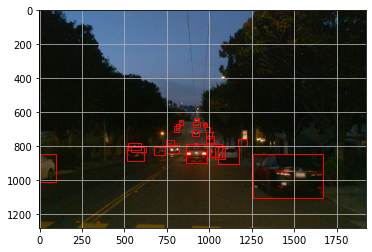

In [59]:
myshowimage_torchdataset(mywaymodataset[45],[1,1,1])

In [60]:
#local version
import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.models.detection.faster_rcnn import FasterRCNN
#from torchvision.models.detection.mask_rcnn import MaskRCNNPredictor

      
def get_object_detection_model(num_classes):
    # load an instance segmentation model pre-trained on COCO
    #model = torchvision.models.detection.maskrcnn_resnet50_fpn(pretrained=True)
    model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
    
#     pretrained_backbone = False
#     trainable_backbone_layers=3
#     backbone = torchvision.models.resnet.resnet50('resnet50', pretrained_backbone, trainable_layers=trainable_backbone_layers)
#     model = FasterRCNN('resnet50', num_classes)
    pretrained= True
    if pretrained:
        #model.load_state_dict(torch.load('./PytorchRCNN/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth'))
        model.load_state_dict(torch.load('./saved_models2/model_9.pth'))
        #state_dict = load_state_dict_from_url(model_urls['fasterrcnn_resnet50_fpn_coco'])
        #model.load_state_dict(state_dict)

    # get the number of input features for the classifier
    in_features = model.roi_heads.box_predictor.cls_score.in_features
    # replace the pre-trained head with a new one
    model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

    return model

In [61]:
#local version
import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.models.detection.faster_rcnn import FasterRCNN
#from torchvision.models.detection.mask_rcnn import MaskRCNNPredictor

      
def get_object_detection_model(num_classes):
    model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
    # get the number of input features for the classifier
    in_features = model.roi_heads.box_predictor.cls_score.in_features
    # replace the pre-trained head with a new one
    model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)
    
    pretrained= True
    if pretrained:
        #model.load_state_dict(torch.load('./PytorchRCNN/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth'))
        model.load_state_dict(torch.load('./saved_models2/model_9.pth'))
        #state_dict = load_state_dict_from_url(model_urls['fasterrcnn_resnet50_fpn_coco'])
        #model.load_state_dict(state_dict)

    # get the number of input features for the classifier
    in_features = model.roi_heads.box_predictor.cls_score.in_features
    # replace the pre-trained head with a new one
    model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

    return model

In [62]:
def load_previous_object_detection_model(num_classes, modelpath):
    model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
    # get the number of input features for the classifier
    in_features = model.roi_heads.box_predictor.cls_score.in_features
    # replace the pre-trained head with a new one
    model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)
    
    pretrained= True
    if pretrained:
        model.load_state_dict(torch.load(modelpath))#'./saved_models2/model_9.pth'))

    return model

In [63]:
num_classes = 4 #Unknown:0, Vehicles: 1, Pedestrians: 2, Cyclists: 3, Signs (removed)
# get the model using our helper function
#model = get_model(num_classes)
#model = get_object_detection_model(num_classes)

In [64]:
previous_model_path = './saved_models4/model_19.pth'
print("Loading previous model: " + previous_model_path)
#model = get_previous_object_detection_model(num_classes, previous_model_path)
model = load_previous_object_detection_model(num_classes, previous_model_path)
    

Loading previous model: ./saved_models4/model_19.pth


Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth


FileNotFoundError: ignored

In [ ]:

# split the dataset in train and test set
indices = torch.randperm(len(mywaymodataset)).tolist()
idxsplit=int(len(indices)*0.80)
dataset_train = torch.utils.data.Subset(mywaymodataset, indices[:idxsplit])
mywaymodataset.transforms = get_transform(train=False)
dataset_test = torch.utils.data.Subset(mywaymodataset, indices[idxsplit+1:])
#print(indices[idxsplit+1:])
# dataset_train = torch.utils.data.Subset(dataset, indices[:-100])
# dataset.transforms = get_transform(train=False)
# dataset_test = torch.utils.data.Subset(dataset, indices[-100:])
print (len(mywaymodataset))
print (len(dataset_test))

1931
386


In [ ]:
import utils
#import vision.references.detection.utils as utils

# define training and validation data loaders
data_loader = torch.utils.data.DataLoader(
    dataset_train, batch_size=8, shuffle=True, num_workers=4,
    collate_fn=utils.collate_fn)

data_loader_test = torch.utils.data.DataLoader(
    dataset_test, batch_size=1, shuffle=False, num_workers=4,
    collate_fn=utils.collate_fn)

In [ ]:
!nvidia-smi

Fri May 29 23:29:38 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.87.00    Driver Version: 418.87.00    CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  On   | 00000000:04:00.0 Off |                    0 |
| N/A   32C    P0    34W / 250W |    879MiB / 12198MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [ ]:
# train on the GPU or on the CPU, if a GPU is not available
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
# move model to the right device
model.to(device)

# construct an optimizer
params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.SGD(params, lr=0.005,
                            momentum=0.9, weight_decay=0.0005)
# and a learning rate scheduler
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer,
                                               step_size=3,
                                               gamma=0.1)

In [ ]:
import numpy
print(numpy.__version__)

1.17.5


In [ ]:
device
#from vision.references.detection.engine import train_one_epoch, evaluate
from engine import train_one_epoch, evaluate
evaluate(model, data_loader_test, device=device)

creating index...
index created!


/home/010796032/newvenv2/lib/python3.6/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/pytorch/torch/csrc/utils/python_arg_parser.cpp:756: UserWarning: This overload of nonzero is deprecated:
	nonzero(Tensor input, *, Tensor out)
Consider using one of the following signatures instead:
	nonzero(Tensor input, *, bool as_tuple)


Test:  [  0/180]  eta: 0:02:09  model_time: 0.2499 (0.2499)  evaluator_time: 0.0563 (0.0563)  time: 0.7169  data: 0.3880  max mem: 632
Test:  [100/180]  eta: 0:00:09  model_time: 0.0841 (0.0863)  evaluator_time: 0.0031 (0.0085)  time: 0.1189  data: 0.0087  max mem: 632
Test:  [179/180]  eta: 0:00:00  model_time: 0.0840 (0.0857)  evaluator_time: 0.0029 (0.0085)  time: 0.1152  data: 0.0078  max mem: 632
Test: Total time: 0:00:21 (0.1194 s / it)
Averaged stats: model_time: 0.0840 (0.0857)  evaluator_time: 0.0029 (0.0085)
Accumulating evaluation results...
DONE (t=0.16s).
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.001
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.000
 Averag

In [ ]:
import sys
from engine import train_one_epoch, evaluate
num_epochs=10
MODEL_DIR = "saved_models5"
!mkdir $MODEL_DIR
for epoch in range(num_epochs):
        # train for one epoch, printing every 10 iterations
        train_one_epoch(model, optimizer, data_loader, device, epoch, print_freq=5)#10
        # update the learning rate
        lr_scheduler.step()
        torch.save(model.state_dict(), os.path.join(MODEL_DIR, "model_%s.pth"%(epoch)))
        # evaluate on the test dataset
        evaluate(model, data_loader_test, device=device)

# for epoch in range(num_epochs):
#         # train for one epoch, printing every 10 iterations
#         train_one_epoch(model, optimizer, data_loader, device, epoch, print_freq=10)
#         # update the learning rate
#         lr_scheduler.step()
#         # evaluate on the test dataset
#         evaluate(model, data_loader_test, device=device)

mkdir: cannot create directory ‘saved_models5’: File exists


/home/010796032/newvenv2/lib/python3.6/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/pytorch/torch/csrc/utils/python_arg_parser.cpp:756: UserWarning: This overload of nonzero is deprecated:
	nonzero(Tensor input, *, Tensor out)
Consider using one of the following signatures instead:
	nonzero(Tensor input, *, bool as_tuple)


Epoch: [0]  [  0/193]  eta: 0:07:40  lr: 0.000031  loss: 0.7563 (0.7563)  loss_classifier: 0.1948 (0.1948)  loss_box_reg: 0.1808 (0.1808)  loss_objectness: 0.0687 (0.0687)  loss_rpn_box_reg: 0.3119 (0.3119)  time: 2.3878  data: 0.9229  max mem: 8853
Epoch: [0]  [  5/193]  eta: 0:05:05  lr: 0.000161  loss: 0.7563 (0.7669)  loss_classifier: 0.1948 (0.2036)  loss_box_reg: 0.1761 (0.1596)  loss_objectness: 0.0687 (0.0780)  loss_rpn_box_reg: 0.3153 (0.3256)  time: 1.6226  data: 0.2023  max mem: 9114
Epoch: [0]  [ 10/193]  eta: 0:04:43  lr: 0.000291  loss: 0.7563 (0.7310)  loss_classifier: 0.1864 (0.1875)  loss_box_reg: 0.1761 (0.1584)  loss_objectness: 0.0687 (0.0771)  loss_rpn_box_reg: 0.3153 (0.3080)  time: 1.5493  data: 0.1337  max mem: 9114
Epoch: [0]  [ 15/193]  eta: 0:04:30  lr: 0.000421  loss: 0.7254 (0.7056)  loss_classifier: 0.1834 (0.1818)  loss_box_reg: 0.1546 (0.1546)  loss_objectness: 0.0552 (0.0634)  loss_rpn_box_reg: 0.3119 (0.3059)  time: 1.5186  data: 0.1072  max mem: 9115


In [ ]:
!nvidia-smi

Fri May 29 22:57:54 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.87.00    Driver Version: 418.87.00    CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  On   | 00000000:04:00.0 Off |                    0 |
| N/A   32C    P0    25W / 250W |      0MiB / 12198MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  